In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def import_data() -> pd.DataFrame:
    sheet_list = [
      'CO2 Emissions from Energy',
      'Oil Consumption - EJ',
      'Gas Consumption - EJ',
      'Coal Consumption - EJ'
               ]

    combined_df = download_individual_sheet(sheet_list[0])
    for i in range(1, len(sheet_list)):
        individual_df = download_individual_sheet(sheet_list[i])
        combined_df = pd.merge(combined_df, individual_df)
    return combined_df


def download_individual_sheet(sheet: str) -> pd.DataFrame:
    path = '/home/jovyan/Econ-481-Final-Project/Statistical Review of World Energy Data.xlsx'
    data = pd.read_excel(path, sheet_name = sheet, skiprows = 2, usecols = range(59))

    data.rename({data.columns[0]: 'Country'}, axis=1, inplace=True)
    data.dropna(inplace = True)

    data = data.loc[data[data.columns[0]].isin(['Mexico', 'US', 'Canada'])]

    data = data.melt(id_vars = 'Country', var_name = 'Year', value_name = sheet)
    data = data.sort_values(by=['Country', 'Year'])

    return data


df = import_data()
print(df)

    Country  Year  CO2 Emissions from Energy  Oil Consumption - EJ  \
0    Canada  1965                 260.328495              2.314145   
1    Canada  1966                 271.695136              2.438144   
2    Canada  1967                 285.543067              2.603182   
3    Canada  1968                 308.282174              2.771255   
4    Canada  1969                 320.455801              2.885563   
..      ...   ...                        ...                   ...   
169      US  2018                5133.219580             37.079029   
170      US  2019                4981.550762             37.022156   
171      US  2020                4462.655147             32.516632   
172      US  2021                4768.377431             35.508236   
173      US  2022                4825.780941             36.150043   

     Gas Consumption - EJ  Coal Consumption - EJ  
0                0.780063               0.647949  
1                0.854010               0.635221  
2     

Text(0, 0.5, 'CO2 Emissions (tons)')

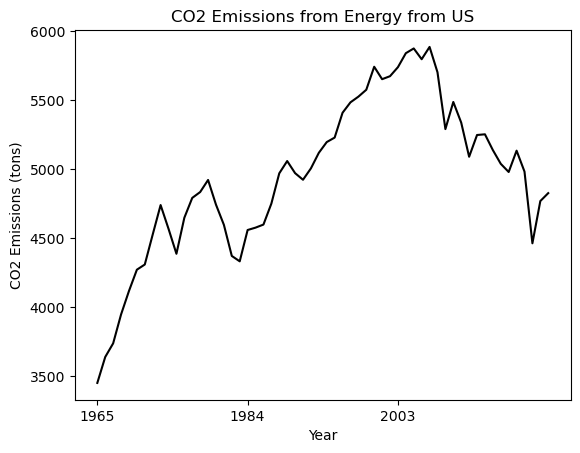

In [3]:
us = df[df.Country == 'US']
tes1 = us["CO2 Emissions from Energy"]
fig, ax = plt.subplots()
tes1.plot(ax=ax, color="black")
plt.xticks(np.arange(116, 173, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("CO2 Emissions from Energy from US")
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions (tons)")

Text(0, 0.5, 'CO2 Emissions (tons)')

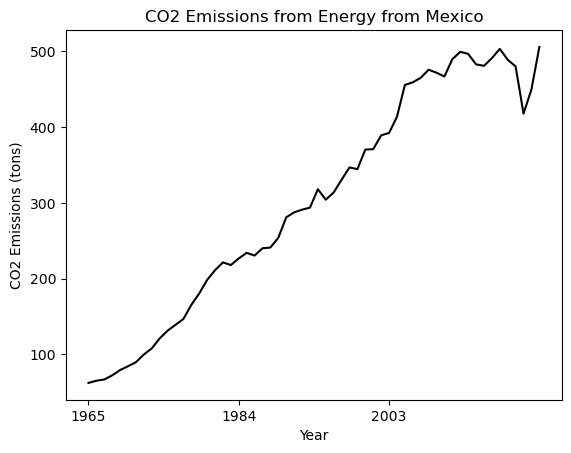

In [4]:
mex = df[df.Country == 'Mexico']
tes2 = mex["CO2 Emissions from Energy"]
fig, ax = plt.subplots()
tes2.plot(ax=ax, color="black")
plt.xticks(np.arange(58, 115, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("CO2 Emissions from Energy from Mexico")
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions (tons)")

Text(0, 0.5, 'CO2 Emissions (tons)')

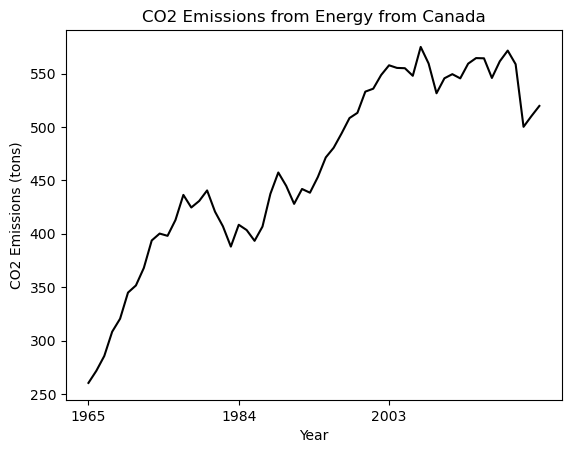

In [5]:
can = df[df.Country == 'Canada']
tes3 = can["CO2 Emissions from Energy"]
fig, ax = plt.subplots()
tes3.plot(ax=ax, color="black")
plt.xticks(np.arange(0, 57, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("CO2 Emissions from Energy from Canada")
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions (tons)")

In [34]:
year = {}
for i in range(58):
    year[i] = df[df.Year == i + 1965]    
print(year[0])

    Country  Year  CO2 Emissions from Energy  Oil Consumption - EJ  \
0    Canada  1965                 260.328495              2.314145   
58   Mexico  1965                  62.133329              0.642414   
116      US  1965                3451.891864             23.092117   

     Gas Consumption - EJ  Coal Consumption - EJ  
0                0.780063               0.647949  
58               0.290329               0.028880  
116             14.973142              11.607279  


In [35]:
for i in range(58):
    year[i]["TotalCO2"] = sum(year[i]["CO2 Emissions from Energy"])
print(year[57])

    Country  Year  CO2 Emissions from Energy  Oil Consumption - EJ  \
57   Canada  2022                 519.702820              4.266870   
115  Mexico  2022                 505.874678              4.118036   
173      US  2022                4825.780941             36.150043   

     Gas Consumption - EJ  Coal Consumption - EJ     TotalCO2  
57               4.378618               0.386039  5851.358439  
115              3.477085               0.251242  5851.358439  
173             31.723642               9.868398  5851.358439  


/tmp/ipykernel_93/1491560098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i]["TotalCO2"] = sum(year[i]["CO2 Emissions from Energy"])
/tmp/ipykernel_93/1491560098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i]["TotalCO2"] = sum(year[i]["CO2 Emissions from Energy"])
/tmp/ipykernel_93/1491560098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [36]:
print(year[57]["TotalCO2"].values[0])

5851.358438684256


In [37]:
df1 = [*range(58)]
for i in range(58):
    df1[i] = year[i]["TotalCO2"].values[0]
print(df1)

[3774.353688215371, 3976.545789042022, 4090.3518239618284, 4327.796599504072, 4516.958733663429, 4700.611825984436, 4750.118165603373, 4993.480822995771, 5240.861203412525, 5088.622385833412, 4915.997645035852, 5199.315738362261, 5374.255672737024, 5423.437190706842, 5532.0817346451795, 5381.0801895461045, 5227.840536355274, 4999.397177884355, 4937.931335195899, 5193.797512006015, 5213.374886330101, 5221.943783796858, 5396.511381807504, 5647.477856856771, 5769.332377043785, 5696.132718183566, 5637.952943427954, 5737.792182386853, 5849.592198917642, 5966.509117250331, 6003.48341959808, 6201.845602059271, 6307.499273180962, 6379.259934755741, 6431.814307419583, 6644.109949229285, 6557.365223587491, 6610.055640134553, 6687.671550892846, 6807.743713870324, 6883.844987805511, 6802.304402467358, 6924.209048653953, 6736.042414170224, 6292.591939114034, 6498.159975898452, 6375.265395128168, 6134.066160039511, 6302.566082387231, 6298.973177649081, 6182.702413077466, 6074.96884450689, 6043.55877

In [38]:
df2 = [*range(1965, 2023, 1)]
print(df2)

[1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


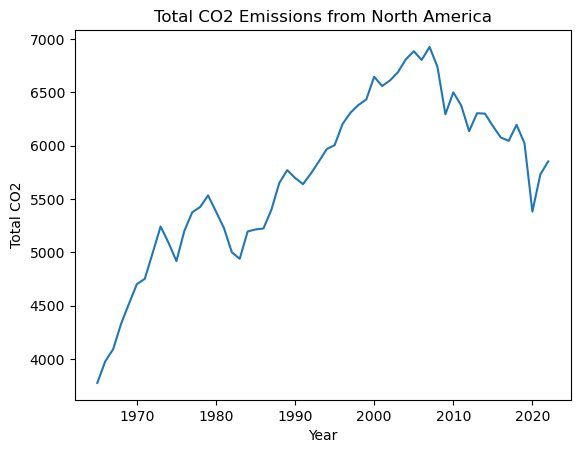

In [39]:
plt.plot(df2, df1)
plt.title("Total CO2 Emissions from North America")
plt.xlabel('Year')
plt.ylabel('Total CO2')
plt.show()

Text(0, 0.5, 'Oil Consumption (EJ)')

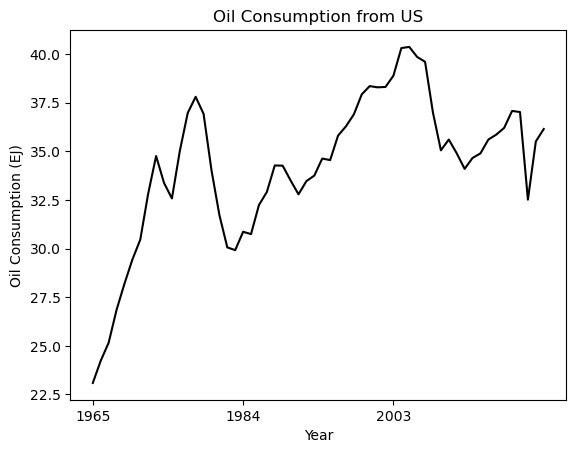

In [6]:
usoil = df[df.Country == 'US']
tes1 = usoil["Oil Consumption - EJ"]
fig, ax = plt.subplots()
tes1.plot(ax=ax, color="black")
plt.xticks(np.arange(116, 173, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Oil Consumption from US")
ax.set_xlabel("Year")
ax.set_ylabel("Oil Consumption (EJ)")

Text(0, 0.5, 'Oil Consumption (EJ)')

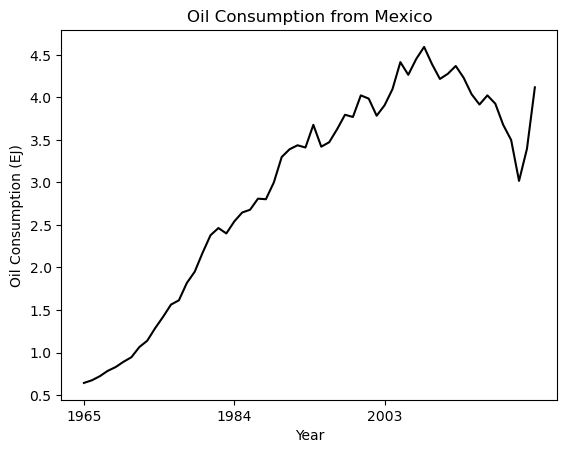

In [7]:
mexoil = df[df.Country == 'Mexico']
tes2 = mexoil["Oil Consumption - EJ"]
fig, ax = plt.subplots()
tes2.plot(ax=ax, color="black")
plt.xticks(np.arange(58, 115, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Oil Consumption from Mexico")
ax.set_xlabel("Year")
ax.set_ylabel("Oil Consumption (EJ)")

Text(0, 0.5, 'Oil Consumption (EJ)')

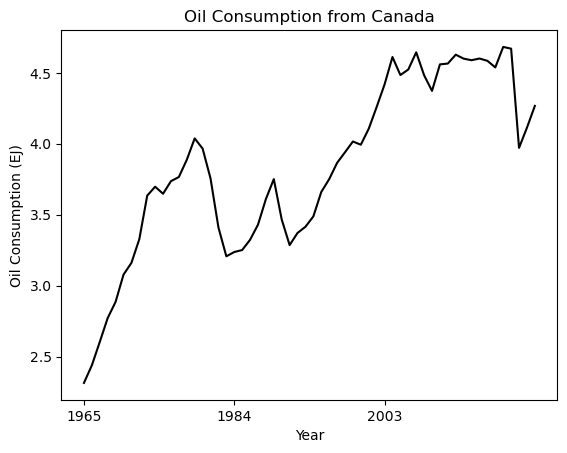

In [8]:
canoil = df[df.Country == 'Canada']
tes3 = canoil["Oil Consumption - EJ"]
fig, ax = plt.subplots()
tes3.plot(ax=ax, color="black")
plt.xticks(np.arange(0, 57, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Oil Consumption from Canada")
ax.set_xlabel("Year")
ax.set_ylabel("Oil Consumption (EJ)")

## Coal Consumption

Text(0, 0.5, 'Coal Consumption (EJ)')

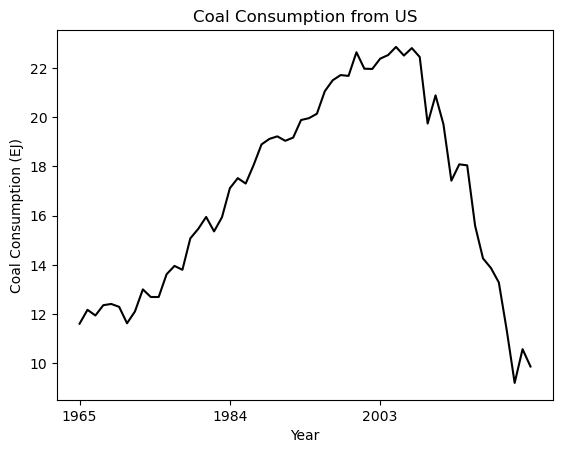

In [9]:
uscoal = df[df.Country == 'US']
tes1 = us["Coal Consumption - EJ"]
fig, ax = plt.subplots()
tes1.plot(ax=ax, color="black")
plt.xticks(np.arange(116, 173, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Coal Consumption from US")
ax.set_xlabel("Year")
ax.set_ylabel("Coal Consumption (EJ)")

Text(0, 0.5, 'Coal Consumption (EJ)')

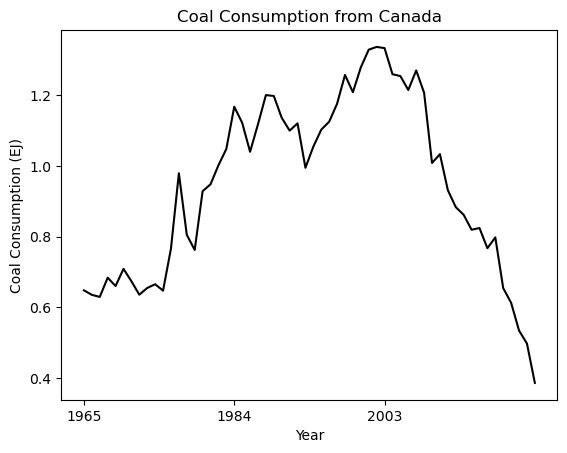

In [10]:
cancoal = df[df.Country == 'Canada']
tes3 = cancoal["Coal Consumption - EJ"]
fig, ax = plt.subplots()
tes3.plot(ax=ax, color="black")
plt.xticks(np.arange(0, 57, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Coal Consumption from Canada")
ax.set_xlabel("Year")
ax.set_ylabel("Coal Consumption (EJ)")

Text(0, 0.5, 'Coal Consumption (EJ)')

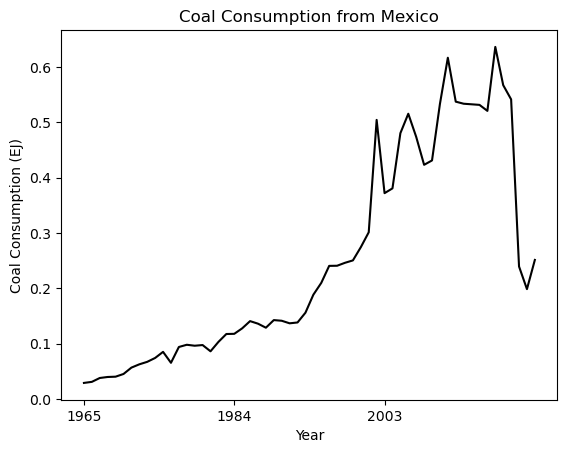

In [11]:
mexcoal = df[df.Country == 'Mexico']
tes2 = mexcoal["Coal Consumption - EJ"]
fig, ax = plt.subplots()
tes2.plot(ax=ax, color="black")
plt.xticks(np.arange(58, 115, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Coal Consumption from Mexico")
ax.set_xlabel("Year")
ax.set_ylabel("Coal Consumption (EJ)")

## Gas Consumption

Text(0, 0.5, 'Gas Consumption (EJ)')

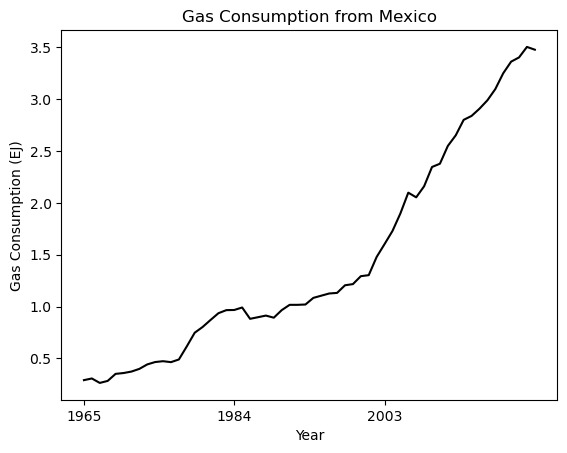

In [12]:
mexgas = df[df.Country == 'Mexico']
tes2 = mexgas["Gas Consumption - EJ"]
fig, ax = plt.subplots()
tes2.plot(ax=ax, color="black")
plt.xticks(np.arange(58, 115, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Gas Consumption from Mexico")
ax.set_xlabel("Year")
ax.set_ylabel("Gas Consumption (EJ)")

Text(0, 0.5, 'Gas Consumption (EJ)')

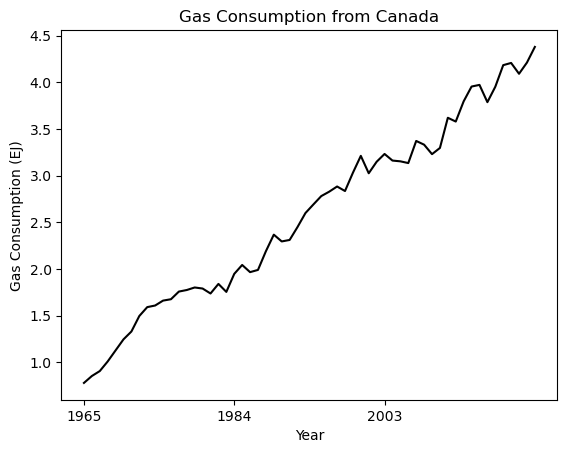

In [13]:
cangas = df[df.Country == 'Canada']
tes3 = cangas["Gas Consumption - EJ"]
fig, ax = plt.subplots()
tes3.plot(ax=ax, color="black")
plt.xticks(np.arange(0, 57, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Gas Consumption from Canada")
ax.set_xlabel("Year")
ax.set_ylabel("Gas Consumption (EJ)")

Text(0, 0.5, 'Gas Consumption (EJ)')

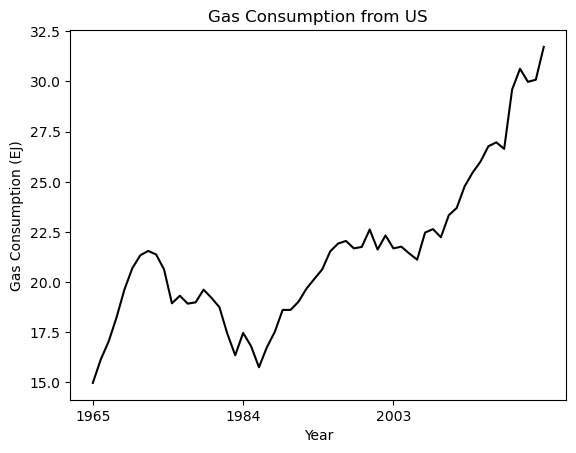

In [14]:
usgas = df[df.Country == 'US']
tes1 = usgas["Gas Consumption - EJ"]
fig, ax = plt.subplots()
tes1.plot(ax=ax, color="black")
plt.xticks(np.arange(116, 173, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Gas Consumption from US")
ax.set_xlabel("Year")
ax.set_ylabel("Gas Consumption (EJ)")

## Total Oil

In [49]:
for i in range(58):
    year[i]["TotalOil"] = sum(year[i]["Oil Consumption - EJ"])
print(year[57])

    Country  Year  CO2 Emissions from Energy  Oil Consumption - EJ  \
57   Canada  2022                 519.702820              4.266870   
115  Mexico  2022                 505.874678              4.118036   
173      US  2022                4825.780941             36.150043   

     Gas Consumption - EJ  Coal Consumption - EJ     TotalCO2   TotalOil  
57               4.378618               0.386039  5851.358439  44.534949  
115              3.477085               0.251242  5851.358439  44.534949  
173             31.723642               9.868398  5851.358439  44.534949  


/tmp/ipykernel_93/3489434830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i]["TotalOil"] = sum(year[i]["Oil Consumption - EJ"])
/tmp/ipykernel_93/3489434830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i]["TotalOil"] = sum(year[i]["Oil Consumption - EJ"])
/tmp/ipykernel_93/3489434830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [50]:
df3 = [*range(58)]
for i in range(58):
    df3[i] = year[i]["TotalOil"].values[0]
print(df3)

[26.048675835132595, 27.343805134296417, 28.483835577964786, 30.403936803340912, 31.90874987840652, 33.40247994661331, 34.567094683647156, 37.223129630088806, 39.53208100795746, 38.36074101924896, 37.64617657661438, 40.326192140579224, 42.356701612472534, 43.5086134672165, 42.91545748710633, 40.17147874832153, 37.8611581325531, 35.935466289520264, 35.528000831604004, 36.64135766029358, 36.642390727996826, 38.24187183380127, 39.15037250518799, 40.687504291534424, 41.01264214515686, 40.26998615264893, 39.46646475791931, 40.278722524642944, 40.57906866073609, 41.79612708091736, 41.6314218044281, 43.032435178756714, 43.77743124961852, 44.639649629592896, 45.718995332717896, 46.37142419815063, 46.38356137275696, 46.35591673851014, 47.217809438705444, 49.01989221572877, 49.26958131790161, 48.64376211166382, 48.701850891113274, 46.06127977371216, 43.81722593307496, 44.38451766967773, 43.74309492111206, 43.098292350769036, 43.48935508728027, 43.52188873291016, 44.123409032821655, 44.4696507453

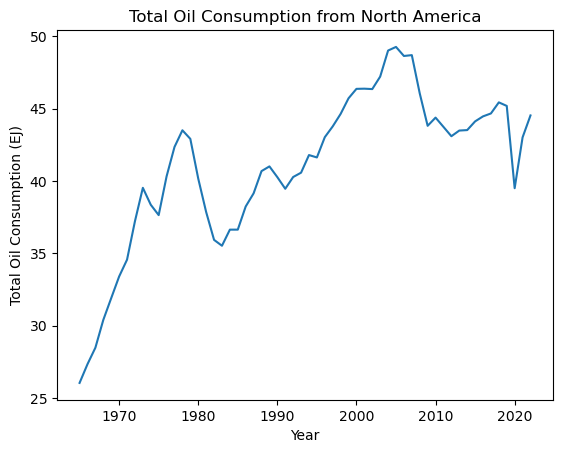

In [51]:
plt.plot(df2, df3)
plt.title("Total Oil Consumption from North America")
plt.xlabel('Year')
plt.ylabel('Total Oil Consumption (EJ)')
plt.show()

## Total Coal

In [52]:
for i in range(58):
    year[i]["TotalCoal"] = sum(year[i]["Coal Consumption - EJ"])
print(year[57])

    Country  Year  CO2 Emissions from Energy  Oil Consumption - EJ  \
57   Canada  2022                 519.702820              4.266870   
115  Mexico  2022                 505.874678              4.118036   
173      US  2022                4825.780941             36.150043   

     Gas Consumption - EJ  Coal Consumption - EJ     TotalCO2   TotalOil  \
57               4.378618               0.386039  5851.358439  44.534949   
115              3.477085               0.251242  5851.358439  44.534949   
173             31.723642               9.868398  5851.358439  44.534949   

     TotalCoal  
57   10.505679  
115  10.505679  
173  10.505679  


/tmp/ipykernel_93/1283060961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i]["TotalCoal"] = sum(year[i]["Coal Consumption - EJ"])
/tmp/ipykernel_93/1283060961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i]["TotalCoal"] = sum(year[i]["Coal Consumption - EJ"])
/tmp/ipykernel_93/1283060961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [53]:
df4 = [*range(58)]
for i in range(58):
    df4[i] = year[i]["TotalCoal"].values[0]

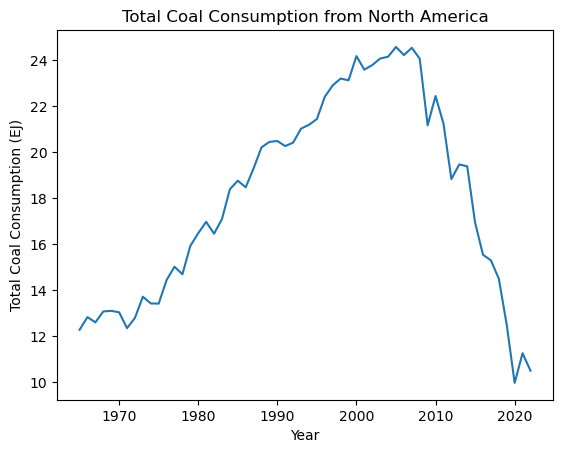

In [54]:
plt.plot(df2, df4)
plt.title("Total Coal Consumption from North America")
plt.xlabel('Year')
plt.ylabel('Total Coal Consumption (EJ)')
plt.show()

## Gas Consumption

In [55]:
for i in range(58):
    year[i]["TotalGas"] = sum(year[i]["Gas Consumption - EJ"])

/tmp/ipykernel_93/2567162283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i]["TotalGas"] = sum(year[i]["Gas Consumption - EJ"])
/tmp/ipykernel_93/2567162283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i]["TotalGas"] = sum(year[i]["Gas Consumption - EJ"])
/tmp/ipykernel_93/2567162283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [56]:
df5 = [*range(58)]
for i in range(58):
    df5[i] = year[i]["TotalGas"].values[0]

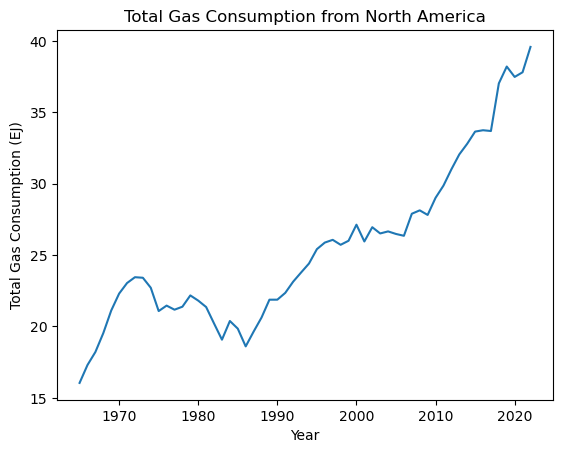

In [57]:
plt.plot(df2, df5)
plt.title("Total Gas Consumption from North America")
plt.xlabel('Year')
plt.ylabel('Total Gas Consumption (EJ)')
plt.show()

## OLS

OLS Summary for Canada:
                            OLS Regression Results                            
Dep. Variable:          CO2_emissions   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3474.
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.49e-50
Time:                        06:29:26   Log-Likelihood:                -143.92
No. Observations:                  46   AIC:                             295.8
Df Residuals:                      42   BIC:                             303.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept       

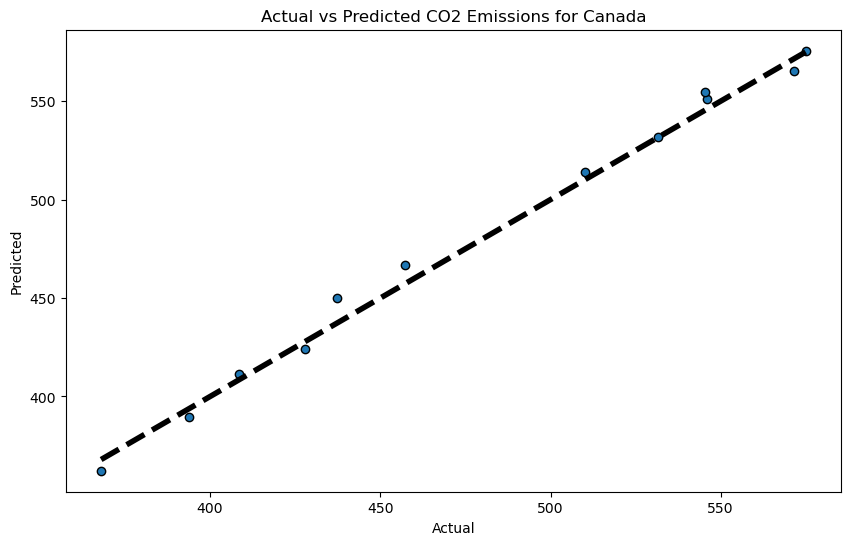

OLS Summary for US:
                            OLS Regression Results                            
Dep. Variable:          CO2_emissions   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     6514.
Date:                Wed, 22 May 2024   Prob (F-statistic):           4.77e-56
Time:                        06:29:26   Log-Likelihood:                -219.11
No. Observations:                  46   AIC:                             446.2
Df Residuals:                      42   BIC:                             453.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          3

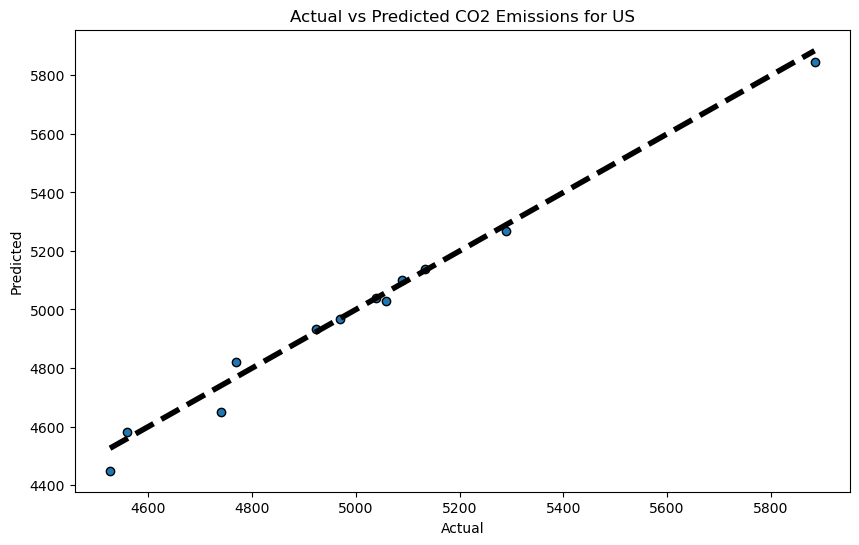

OLS Summary for Mexico:
                            OLS Regression Results                            
Dep. Variable:          CO2_emissions   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.674e+04
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.21e-64
Time:                        06:29:26   Log-Likelihood:                -131.16
No. Observations:                  46   AIC:                             270.3
Df Residuals:                      42   BIC:                             277.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept       

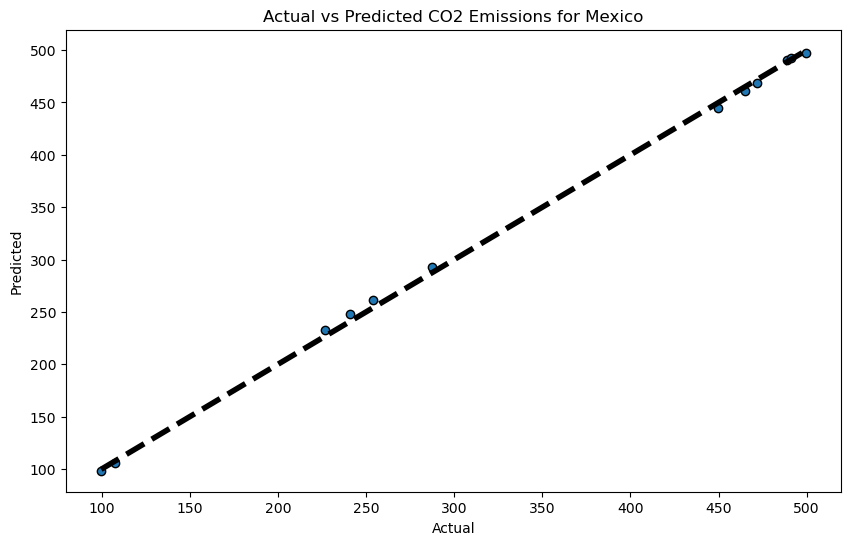

In [59]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def ols(df: pd.DataFrame):
    # Rename columns for easier reference
    df = df.rename(columns={
        'CO2 Emissions from Energy':'CO2_emissions', 
        'Oil Consumption - EJ':'oil_consumption', 
        'Gas Consumption - EJ':'gas_consumption', 
        'Coal Consumption - EJ':'coal_consumption'
    })

    countries = ["Canada" , "US", "Mexico"]

    for i in countries:
        subset = df[df["Country"] == i]
        subset_train, subset_test = train_test_split(
            subset,
            test_size=0.2,
            random_state=12
        )

        ols_model = smf.ols('CO2_emissions ~ oil_consumption + gas_consumption + coal_consumption', data=subset_train).fit()
        print(f"OLS Summary for {i}:")
        print(ols_model.summary())

        def normalized_rmse(y_true, y_pred):
            rmse = mean_squared_error(y_true, y_pred, squared=False)
            std_dev = np.std(y_true)
            nrmse = rmse / std_dev
            return nrmse

        pred = ols_model.predict(subset_test)
        actual = subset_test['CO2_emissions']

        # Plotting the actual vs predicted values
        plt.figure(figsize=(10, 6))
        plt.scatter(actual, pred, edgecolors=(0, 0, 0))
        plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=4)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'Actual vs Predicted CO2 Emissions for {i}')
        plt.show()


ols(df)